The amplification factor in backward Lax-Wendroff is 
$$\epsilon(k,\sigma) = \left(1 + \frac{\sigma^2}{2} - \frac{3}{2}\sigma\right) - \left(\sigma^2 - 2 \sigma\right)e^{-\dot{\iota}kh} + \left(\frac{\sigma^2}{2} - \frac{\sigma}{2}\right)e^{-2\dot{\iota}kh} $$
We then put $-kh = \theta$ and define
$$\tilde{\epsilon}(\theta,\sigma) = \left(1 + \frac{\sigma^2}{2} - \frac{3}{2}\sigma\right) - \left(\sigma^2 - 2 \sigma\right)e^{\dot{\iota}\theta} + \left(\frac{\sigma^2}{2} - \frac{\sigma}{2}\right)e^{2\dot{\iota}\theta}$$
We'd then find $\sigma$ for which $$|\tilde{\epsilon}(\sigma,\theta)| \le 1, \quad \forall \theta \in [0,2\pi]$$

The amplifaction factor in central Lax-Wendroff is 

$$\gamma(k,\sigma) = \left(-\frac{\sigma}{2} +\frac{\sigma^2}{2}\right)e^{\dot{\iota}kh} + (1 -\sigma^2) + \left(\frac{\sigma}{2} + \frac{\sigma^2}{2} \right) e^{-\dot{\iota}kh}$$

Again, defining $$\tilde{\gamma}(\theta,\sigma) =\left(-\frac{\sigma}{2} +\frac{\sigma^2}{2}\right)e^{\dot{\iota}\theta} + (1 -\sigma^2) + \left(\frac{\sigma}{2} + \frac{\sigma^2}{2} \right) e^{-\dot{\iota}\theta}$$

We'd find $\sigma$ for which 
We'd then find $\sigma$ for which $$|\tilde{\gamma}(\sigma,\theta)| \le 1, \quad \forall \theta \in [0,2\pi]$$


In [1]:
import numpy as np
from numpy import exp,pi
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

In [2]:
#Defining amplification factor functions for both schemes
def amp_back(theta,sigma):
  amp = 1.0 + sigma**2/2.0 - 1.5 * sigma
  amp -= (sigma**2 - 2.0*sigma)*exp(1.0j*theta)
  amp += (sigma**2/2.0 - sigma/2.0) * exp(2.0j*theta)
  return amp
def amp_cent(theta,sigma):
  amp = ( (-sigma/2.0 + sigma**2/2.0)*exp(1.0j*theta) 
         + 1.0 - sigma**2
         + (sigma/2.0 + sigma**2/2.0) * exp(-1.0j * theta) ) 
  #Cannot decide which version is better
  return amp

In [3]:
theta = np.linspace(0.0,np.pi, 100) #phase angles phi_k for k = {-30,...,30}

In [4]:
#Finding cfl numbers for both schemes
for sigma in [0.9,1.0,1.1,1.9,2.1]:
  amp_f_back = max(np.abs(amp_back(theta,sigma))) #amp. factor in back. scheme
  amp_f_cent = max(np.abs(amp_cent(theta,sigma))) #amp. factor in cent. scheme
  print("Amp_factor in backward lw for sigma = ", sigma, " is ", amp_f_back)
  print("Amp_factor in central lw for sigma = ", sigma, " is ", amp_f_cent)

Amp_factor in backward lw for sigma =  0.9  is  1.0
Amp_factor in central lw for sigma =  0.9  is  1.0
Amp_factor in backward lw for sigma =  1.0  is  1.0
Amp_factor in central lw for sigma =  1.0  is  1.0
Amp_factor in backward lw for sigma =  1.1  is  0.9999999999999999
Amp_factor in central lw for sigma =  1.1  is  1.4200000000000004
Amp_factor in backward lw for sigma =  1.9  is  1.0
Amp_factor in central lw for sigma =  1.9  is  6.22
Amp_factor in backward lw for sigma =  2.1  is  1.4199999999999997
Amp_factor in central lw for sigma =  2.1  is  7.82


Thus, cfl for central Lax-Wendroff is 1.0, while for backward Lax-Wendroff it is 2.0

#Dissipation error comparison

Fixing a $\sigma$ for our scheme, $\gamma_k = \epsilon(k,\sigma)$, which we can compute in our code as 

```
amp(sigma,-kh)
```
For $U_j^n$ being the approximate solution. recall that $\gamma_k$ satisfies $U_j^n = \sum c_k e^{ikx_j} \implies U_j^{n+1} = \sum \gamma_k c_k e^{ikx_j}$. The solutions of our original PDE are of the form $u_j^n = \sum c_k e^{\dot{\iota}kx_j}(g_k)^n$ such that $|g_k| = 1$, i.e., they have no dissipation. Ideally, we we would also like this in our scheme.

So, we'd like $|\gamma_k|$ to be close to 1. The closer $\gamma_k$ is to $1$, the lesser dissipation our scheme shall have.

Thus, to check which scheme has lesser dispersion, we plot the two amplification factors. We'd be trying it for many choices of $\sigma$, so we isolate the plotting function

In [5]:
def dissipation_compare(sigma):
  h = 0.1
  #k = np.linspace(0,np.ceil(np.pi/h)+1,61) 
  theta = np.linspace(0,np.pi,30) #All phase angles from 0 to pi
  back = np.abs(amp_back(theta,sigma))
  cent = np.abs(amp_cent(theta,sigma))
  #There is no point in plotting the central scheme for seeing dissiptativity
  #error of central scheme when it is unstable(i.e., for CFL > 1), but we may
  #want to look at backward Lax-Wendroff for cfl > 1.
  if sigma <= 1.0:
    plt.plot(theta,cent, label = "Central Lax-Wendroff") 
  else:
    print("Supressed Central Lax-Wendroff, as sigma>1")
  plt.plot(theta,back, label = "Backward Lax-Wendroff")
  plt.xlabel('Phase Angle')
  plt.ylabel('Dissipation error')
  plt.title('CFL = '+str(sigma))
  plt.grid(True)
  plt.legend()
  plt.show()

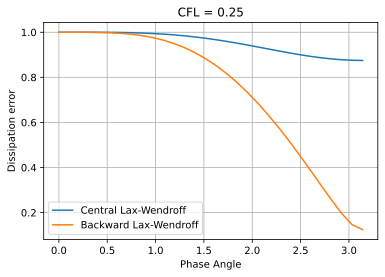

In [6]:
dissipation_compare(0.25)

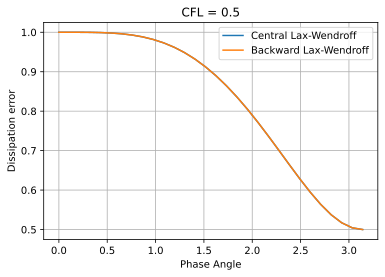

In [7]:
dissipation_compare(0.5)

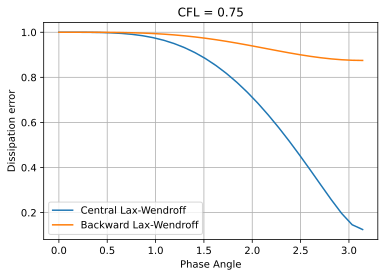

In [8]:
dissipation_compare(0.75)

We observe that Central Lax-Wendroff wins for $\sigma < 0.5$, backward Lax-Wendroff wins for $\sigma > 0.5$. There's an exact draw for $\sigma = 0.5$

It must be noted that it is NOT okay to compare two graphs over different CFLs. The dissipation and dispersion errors are something that add up in every time step. Even if dispersion error increases going from CFL 0.25 to 0.5, since you would be taking half the number of steps, the total accumulated error may or may not increase. If you want to compare different CFL plots, you would need to plot $error^{\frac{1}{CFL}}$.

You might think that it makes more sense to do $error * (1/cfl)$ because for double cfl, to reach the same time, half as many steps would be needed, so total accumulated error would be half of dissipation error. BUT, the dispersion error is not being added, it is actually being multiplied at each stage!! (Recall that dissipation is the factor what's being multiplied and we'd like it to be 1. The farther it is from 1, the higher the dissipation error.) So, if dissipation error is $x$ for CFL 0.5 it will be $x^2$ for CFL 0.25. But, $x^{1/0.5} = x^{2/0.25}$.

In [34]:
def dissipation_compare_cfl(sigma):
  h = 0.1
  #k = np.linspace(0,np.ceil(np.pi/h)+1,61) 
  theta = np.linspace(0,np.pi,30) #All phase angles from 0 to pi
  back = np.abs(amp_back(theta,sigma))**(1.0/sigma)
  cent = np.abs(amp_cent(theta,sigma))**(1.0/sigma)
  #There is no point in plotting the central scheme for seeing dissiptativity
  #error of central scheme when it is unstable(i.e., for CFL > 1), but we may
  #want to look at backward Lax-Wendroff for cfl > 1.
  if sigma <= 1.0:
    plt.plot(theta,cent, label = "Central Lax-Wendroff") 
  else:
    print("Supressed Central Lax-Wendroff, as sigma>1")
  plt.plot(theta,back, label = "Backward Lax-Wendroff")
  plt.xlabel('Phase Angle')
  plt.ylabel('Dissipation error')
  plt.title('CFL = '+str(sigma))
  plt.grid(True)
  plt.legend()
  plt.show()

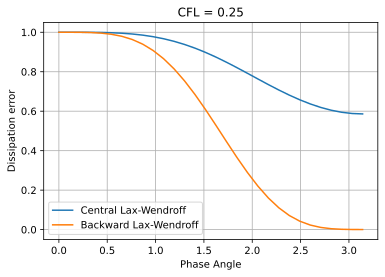

In [35]:
dissipation_compare_cfl(0.25)

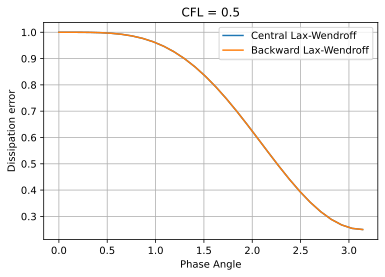

In [36]:
dissipation_compare_cfl(0.5)

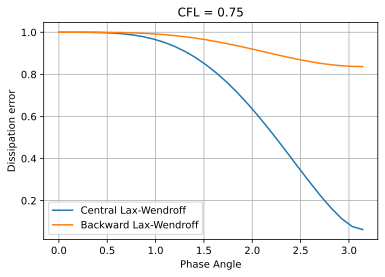

In [37]:
dissipation_compare_cfl(0.75)

#**Dispersion**

$\newcommand{\Iota}{\dot{\imath}}$

If initial  $u_0(x) = \sum_k \alpha_k e^{\dot{\iota} k x}$, the exact solution is $$u(x_j,t^n) = \sum_{k \in \mathbb{Z}}c_k e^{\dot{\iota}kx_j}(g_k)^n$$
where $g_k = e^{-\Iota a k \Delta t}$. The approximate solution is $\sum c_k e^{\Iota k x_j}\alpha_k^n$. The dissipation error was about comparing absolute value of $g_k$ to that of $\alpha_k$, while dispersion is related to comparing arguments of $g_k, \alpha_k$. Defining $\phi_k = kh$ to be the phase angle of $k^\text{th}$ harmonic, we write $g_k = e^{-\Iota a \frac{\Delta t}{h} hk} = e^{-\Iota a \lambda \phi_k}$. <s>It is natural to say that $a$ is the speed of propogation of the $k^\text{th}$ harmonic if we remember that $g_k = e^{- a k \Delta t}$. Now notice that this speed is independent of $k$. We'd desire the same from our scheme. </s> We call $a$ to be the propogation speed, it quantifies how the solution **disperses**. Let's see the propogation speed of our numerical solution by writing the $k^\text{th}$ amplitude in the same form. Of course, we can write $\gamma_k$ as
$$\gamma_k = |\gamma_k| e^{-\Iota \omega_k \Delta t} $$
Thus, as 
$$\gamma_k = |\gamma_k| e^{-\Iota \frac{\omega_k}{k} \lambda \phi_k}$$
Thus, $\frac{\omega_k}{k}$ gives the propogation speed of $k^\text{th}$ harmonic of approximate solution. Thus, we define the dispersion error as 
$$\epsilon_d(k) = \frac{\omega_k}{ak} = \frac{\omega_k h}{a\phi_k} =:\epsilon_d(\phi_k, \text{CFL}), \quad -\pi \le \phi_k \le \pi$$

This quantity can also be computed as 
$$-\frac{\text{arg}(\gamma_k)}{a\lambda \phi_k} =-\frac{\text{arg}(\gamma_k)}{\sigma \phi_k} $$
And, we'd like it to be close to $1$

In [9]:
from numpy import angle
from numpy import abs

def back_dispersion_error(theta,sigma):
  return abs(angle(amp_back(theta,sigma)) / (sigma * theta))
def cent_dispersion_error(theta,sigma):
  return abs(angle(amp_cent(theta,sigma)) / (sigma * theta))

def dispersion_compare(sigma):
  h = 0.1
  theta = np.linspace(0,np.pi,30) #All phase angles from 0 to pi
  theta = np.delete(theta,0) #Removing the phase angle 0.
  back = np.abs(back_dispersion_error(theta,sigma))
  cent = np.abs(cent_dispersion_error(theta,sigma))
  constant_one = np.ones(len(cent))
  plt.plot(theta,constant_one)
  #There is no point in plotting the central scheme for seeing dissiptativity
  #error of central scheme when it is unstable(i.e., for CFL > 1), but we may
  #want to look at backward Lax-Wendroff for cfl > 1.
  if sigma <= 1.0:
    plt.plot(theta,cent, label = "Central Lax-Wendroff") 
  else:
    print("Supressed Central Lax-Wendroff, as sigma>1")
  plt.plot(theta,back, label = "Backward Lax-Wendroff")
  plt.xlabel('Phase Angle')
  plt.ylabel('Dispersion error')
  plt.title('CFL = '+str(sigma))
  plt.grid(True)
  plt.legend()
  plt.show()

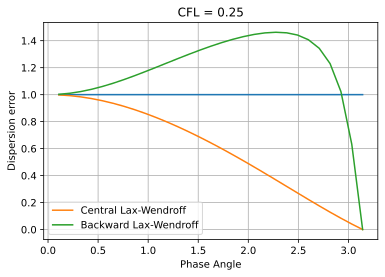

In [10]:
dispersion_compare(0.25)

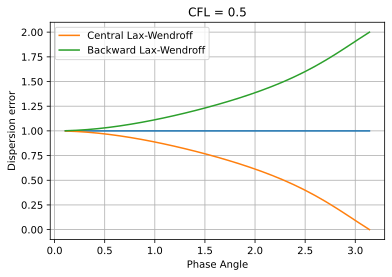

In [11]:
dispersion_compare(0.5)

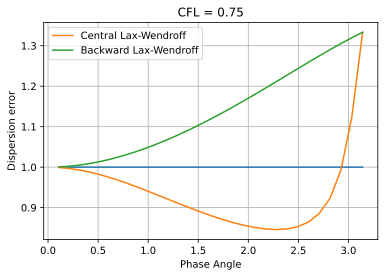

In [12]:
dispersion_compare(0.75)

It is interesting that the backward difference always stays above. From these, it is clear that there's a draw for $\sigma = 0.5$. Victory of backward Lax-Wendroff in some parts of $\sigma = 0.1$ and victory of central Lax-Wendroff for $\sigma = 0.9$ are quite clear. But, to get more clarity, we just plot their differences from $1$.

In [13]:
def dispersion_compare(sigma):
  #h = 0.1
  #theta = -h * np.linspace(-30,30,61) #All phase angles phi_k, for k in (-30,30)
  theta = np.linspace(0,np.pi,30)
  theta = np.delete(theta,0) #Removing the phase angle 0.
  back = np.abs(back_dispersion_error(theta,sigma) - 1.0)
  cent = np.abs(cent_dispersion_error(theta,sigma) - 1.0)
#There is no point in plotting the central scheme for seeing dissiptativity
#error of central scheme when it is unstable(i.e., for CFL > 1), but we may
#want to look at backward Lax-Wendroff for cfl > 1.
  if sigma <= 1.0:
    plt.plot(theta,cent, label = "Central Lax-Wendroff") 
  else:
    print("Supressed Central Lax-Wendroff, as sigma>1")
  plt.plot(theta,back, label = "Backward Lax-Wendroff")
  plt.xlabel('Phase Angle')
  plt.ylabel('|Dispersion error - 1|')
  plt.title('CFL = '+str(sigma))
  plt.grid(True)
  plt.legend()
  plt.show()

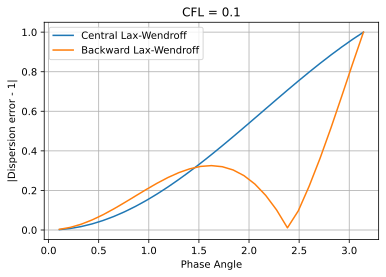

In [14]:
dispersion_compare(0.1)

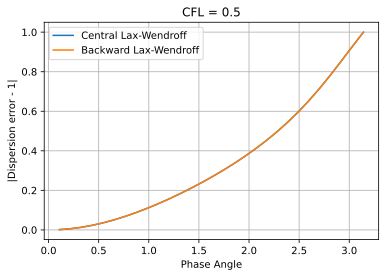

In [15]:
dispersion_compare(0.5)

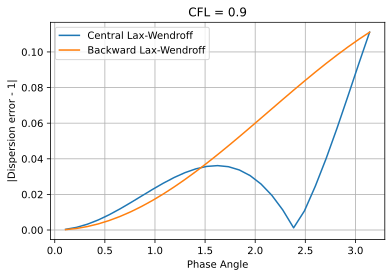

In [16]:
dispersion_compare(0.9)

We got the opposite results as we did for dissipation! A tie for $\sigma = 0.5$. Victory of backward for $\sigma < 0.5$ and of central for $\sigma > 0.5$

##High CFL
Ideally, we want to run close to the CFL limit(to minimize number of time steps needed?), so we analyze the behaviour for high CFL.

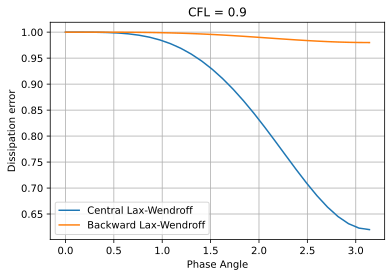

In [17]:
dissipation_compare(0.9)

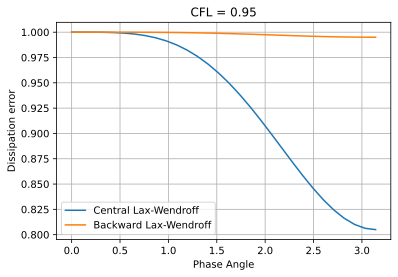

In [18]:
dissipation_compare(0.95)

For high CFL, Central Lax-Wendroff is getting really bad. Thus, we naturally conjecture that as a scheme approaches its CFL limit, it has high dissipation error.

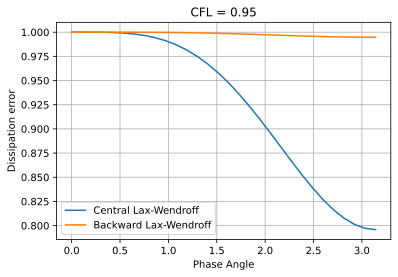

In [38]:
dissipation_compare_cfl(0.95)

Supressed Central Lax-Wendroff, as sigma>1


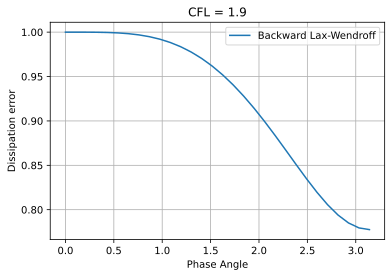

In [39]:
dissipation_compare_cfl(1.9)

Our conjecture seems to be backed by this case. It is something difficult to reconcile with our observation of having a different winner for $\sigma < 0.5$ and $\sigma > 0.5$, which make us wonder if there's some symmetry. Perhaps, there isn't a symmetry, and it's just that the dissipation error increases for higher cfl. Since Central Lax-Wendroff has a higher CFL limit, the dissipation error increases slower(And they just collide into each other at $\sigma = 0,5$? That still needs to be understood). Let's see the dissipation error next.

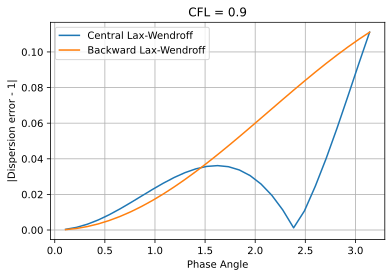

In [20]:
dispersion_compare(0.9)

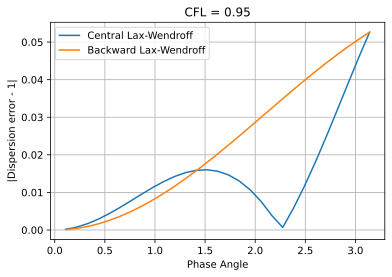

In [21]:
dispersion_compare(0.95)

For both of the schemes, the dispersion error is decreasing for high cfl. So, we conjecture that the dispersion error just decreases with an increase in cfl.

Supressed Central Lax-Wendroff, as sigma>1


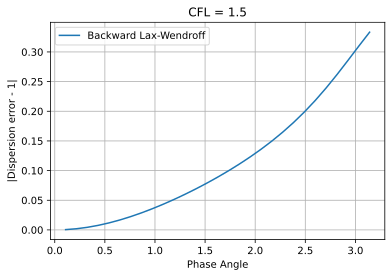

In [22]:
dispersion_compare(1.5)

Supressed Central Lax-Wendroff, as sigma>1


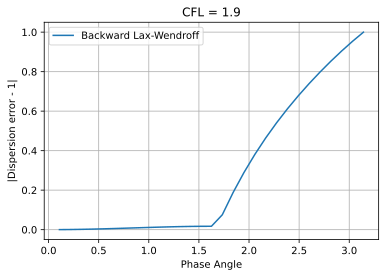

In [23]:
dispersion_compare(1.9)

This conjecture doesn't hold at all. It needs to be understood why Central Lax-Wendroff has good dispersion error even when we are close to its CFL limit. 